In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive

In [2]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Estadística e Inferencia I/DFs/blocks.csv"

Mounted at /content/drive


In [3]:
df = pd.read_csv(path)
n = len(df)

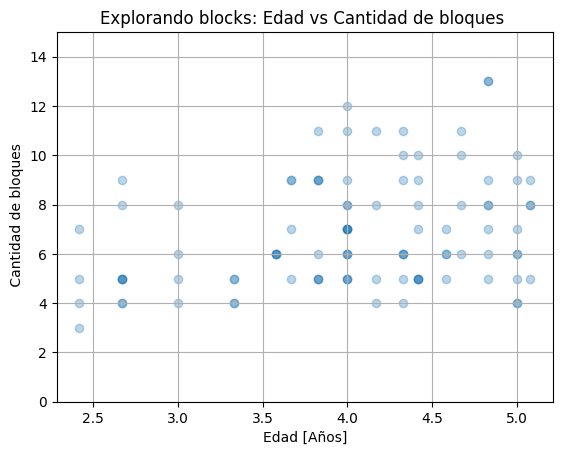

In [4]:
fig, ax = plt.subplots()
ax.scatter(df["Age"], df["Number"], alpha = 0.3)
ax.set_xlabel("Edad [Años]")
ax.set_ylabel(" Cantidad de bloques")
ax.set_title("Explorando blocks: Edad vs Cantidad de bloques ")
ax.set_ylim(0,15)
plt.grid()
plt.show()

Pienso la variable target como un GLM de Binomial Negativa, ya que pienso que está contando la altura de las torre hasta que se caiga (éxito). Además la respuesta toma valores en $ \mathbb{N} $.

Propongo el modelo:
$$ Y \sim BN(1,\mu) $$
\
$$ \eta = \log(\mu) = \beta_0 + \beta_1X $$
\
$$ \large \mu = e^{\beta_0 + \beta_1X}$$

In [21]:
def neg_log_likelihood_binom_neg(beta, X, Y):
    mu = np.exp(X @ beta)
    return -np.sum( Y * np.log(mu / (1 + mu)) + np.log( 1 / (1 + mu)) )

b0 =  1.3208262323875497
b1 =  0.1473825631239106


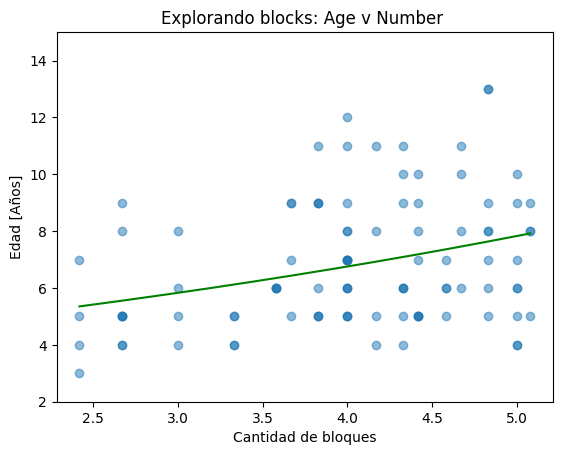

In [26]:
from scipy.optimize import minimize

X,Y = df["Age"], df["Number"]

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.ones(X_with_intercept.shape[1])

res_binom_neg = minimize(neg_log_likelihood_binom_neg, initial_beta, args=(X_with_intercept, Y))

b0 = res_binom_neg.x[0]
b1 = res_binom_neg.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)

X_plot = np.column_stack((np.ones(x_range.shape), x_range))
eta_plot = X_plot @ np.array([b0, b1])
mu_plot = np.exp(eta_plot)


fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5)
ax.plot(x_range,mu_plot, color='g')
ax.set_xlabel("Cantidad de bloques")
ax.set_ylabel("Edad [Años]")
ax.set_title("Explorando blocks: Age v Number ")
ax.set_ylim(2,15)
plt.show()

In [39]:
from numpy.linalg import inv

mu = np.exp(X_with_intercept @ res_binom_neg.x)
W = np.diag( (mu + mu**2) / mu **2 )

I = X_with_intercept.T @ W @ X_with_intercept

cov_matrix = inv(I)
cov_matrix

array([[ 0.26187863, -0.06304659],
       [-0.06304659,  0.01570038]])

In [40]:
se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

se(b0) = 0.5117407850639909
se(b1) = 0.12530113807320264
